## CBF (Obstacle avoidance)
1. For a simple manipulator, we can define the state space as $x_2 = \dot x_1 = J \dot q$ and $\dot x_2 = \dot J \dot q + J \ddot q$ where $\ddot q = M^{-1} (\tau - h)$. We can then set $f(q) = \dot J \dot q - J M^{-1} h$, $g(q) = J M^{-1}$ and $u = \tau$
2. Introducing a constraint equation for obstacle avoidace, $h(x) = (x_o - x_1)^T A (x_o - x_1) - 1 \geq 0$

# Lecture by Jason Choi


#### Lyapunov stability
1. A system $\dot x = f(x)$ is lyapunov stable if we can find a function $V(x) > 0, V(x_e) = 0$ and $\dot V(x) = \frac{\partial V}{\partial x} f(x) < 0, x \neq x_e$
2. Furthermore, a sublevel set such that $\Omega_c = \{x | V(x) \leq c \}$ is an invariant set. This is due to the second property above, i.e. if you start within this set, the lyapunov function will drive you closer to $x_e$ along your trajectories.

#### Nagumo's invariance principle
1. Consider a system that evolves from an initial point $x_0$, we are interested in knowing if the trajectory goes out of some set.
2. For the superlevel set $C = \{ x | h(x) \geq 0 \}$, if the function $h(x)$ is such that $\dot h(x) \geq 0, \forall x \in \partial C$, when you hit the boundary, the trajectory will be pushed into the set. This set $C$ is invariant.

#### Differences
1. For Lyapunov stability, every positive sublevel set $\Omega_c, c \geq 0$ is invariant
2. For Nagumo's invariance principle, only the 0-superlevel set $(h(x) \geq 0)$ is invariant

#### Control affine system
1. We will only deal with control affine systems $\dot x = f(x) + g(x) u$
2. One example is $\begin{bmatrix}
\dot q
\\ 
\ddot q
\end{bmatrix}
=
\begin{bmatrix}
\dot q
\\ 
M^{-1} (- C \dot q - g)
\end{bmatrix}
+
\begin{bmatrix}
0
\\ 
M^{-1}
\end{bmatrix}
\tau$

### Control Lyapunov Function (CLF)
1. Lets $V(x): \mathbb{R}^n \rightarrow \mathbb{R}$ be a continuously differentiable function
2. If there exists constant $c \geq 0$ such that:
    * The sublevel set $\Omega_c$ is bounded
    * $V(x) > 0, \forall x \in \mathbb{R}^n \setminus \{x_e\}$ where $V(x_e) = 0$
    * $min_{u \in U} \dot V(x,u) < 0, \forall x \in \Omega_c \setminus\{x_e\}$ (xy: what does the min function mean?)
3. Then, $V(x)$ is a (local) (due to the boundedness) CLF and $\Omega_c$ is the region of attraction
4. $\Omega_c$ is a asymptotically stabalizable to $x_e$
5. The lie derivative is involved here such that $\dot V(x, u) = \nabla V f(x) + \nabla V g(x) u = L_f V(x) + L_g V(x) u$, which is affine in $u$
6. 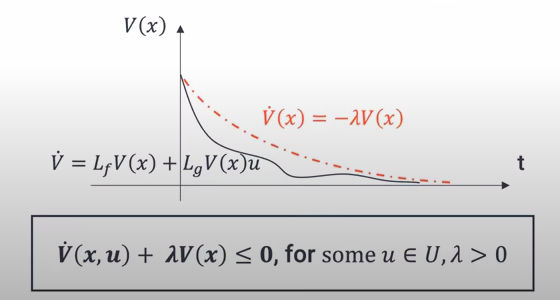

### Exponentially Stabilizing CLF
1. There is no notion of how fast the state trajectories will converge (asymptotically)
2. We can go 1 step further by constructing a ES-CLF to exponentially stabilize the system, i.e. $\dot V(x,u) \leq - \lambda V(x), u \in U, \lambda > 0$


### CLF-QP
1. We will use a $L_2$ min norm controller:
    * $ argmin_{u, \delta} (u - u_{ref})^T  H (u - u_{ref}) + p \delta^2$
    * subject to $L_f V(x) + L_g V(x) u + \lambda V(x) \leq \delta$ (*CLF constraint*)
    * subject to $u \in U$ (*input constraints*)

### CBF
1. Now from the Nagumo's invariance priciple, we can use the same tools developed earlier to find a function $B(x)$ such that $B(x,u) \geq 0, \forall x\in \partial C, \exists u \in U$
2. More formally, let $B(x): \mathbb{R}^n \rightarrow \mathbb{R}$ be a continuously differentiable function whose 0-superlevel set is $C = \{ x | B(x) \geq 0\}$ and $\nabla B (x) \neq 0, \forall x \in \partial C$
3. If there is a postive constant $\gamma$ such that $\forall x \in C$, $sup_{u \in U} [L_f B(x) + L_g B(x) u] + \gamma B(x) \geq 0$
4. 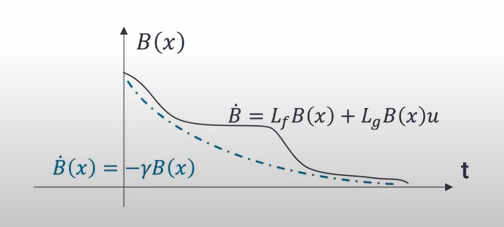